In [ ]:
#Colab users uncomment this code
#File for this notebook is "NN_dataset.npz"

In [ ]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:

downloaded = drive.CreateFile({'id':'1ojk4W1lbj9wAPxZp7eeDzf1mGfahjW_U'}) # replace the id with id of file you want to access
downloaded.GetContentFile('NN_dataset.npz')



# Introduction

In this assignment we will be implementing a Neural Network from scratch to get a better understanding of how a Neural Network works and why does adding a hidden layer improve its performance.
In this assignment, you will be working with an artificially generated dataset. It is a small 2 dimensional  dataset, involving a binary classification task. The two features of  are the  and  co-ordinates on the 2D plane.  can have 2 values,  and  indicating the two classes.
The Assignment will be divided into 2 major parts:

P1: Applying a Logistic Regression model using sci-kit learn and see how it performs on the dataset. (This step is already taken care for you)
P2: Implementing a Neural Network with 1 hidden layer and compare its performance with the Logitic Regression.

##Preparation

###Import the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###Loading dataset.npz

In [ ]:
data = np.load("NN_dataset.npz")
X_train = data["X_train"]
Y_train = data["Y_train"]
X_test = data["X_test"]
Y_test = data["Y_test"]

###Viewing Shape

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (2, 452)
Shape of Y_train: (1, 452)
Shape of X_test: (2, 194)
Shape of Y_test: (1, 194)


###Visualizing the Training Data

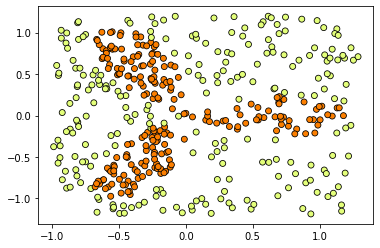

In [ ]:
plt.scatter(X_train[0,:], X_train[1, :], c = Y_train.ravel(), cmap = plt.cm.Wistia, linewidths = 0.8, edgecolors = 'black')

As we can see, we will be needing a non-linear Decision Boundary to separate the 2 classes shown by 2 different colours.



###Function to plot the Decision Boundary


Decision Boundary for a classification task refers to the hypersurface that divides the two classes. In a 2D plane for a binary classification task, it is a curve that divides the plane into two halves where the points in one half belong to one class while the points in the other half belong to the other class. The goal of a classification task is to learn this curve.
The function below plots the decision boundary for the fitted model. We'll use this to visualize the decision bundary learnt by our different models.

In [ ]:
def plot_decision_boundary(predict_function, X, Y, trained_parameters = None):
    xmin, xmax = X[0,:].min() - 0.25, X[0,:].max() + 0.25
    ymin, ymax = X[1,:].min() - 0.25, X[1,:].max() + 0.25
    
    xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
    if trained_parameters is None:
        z = predict_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = predict_function(np.c_[xx.ravel(), yy.ravel()].T, trained_parameters)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap=plt.cm.Wistia)
    plt.scatter(X[0,:], X[1,:], c = Y.ravel(), cmap = plt.cm.Wistia, linewidths = 0.8, edgecolors = 'black')

#P1:Logistic Regression
Let's use sci-kit learn to fit a Logistic Regression model on this dataset to see how it performs

In [ ]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

#Fitting the model
clf = LogisticRegression(solver = 'lbfgs').fit(X_train.T, Y_train.ravel().T) #Specifying solver to suppress warning

#Printing train and test set accuracy
print(f"Train set accuracy: {clf.score(X_train.T, Y_train.ravel().T)*100}"+"%")
print(f"Test set accuracy: {clf.score(X_test.T, Y_test.ravel().T)*100}"+"%")

Train set accuracy: 62.61061946902655%
Test set accuracy: 63.4020618556701%


Clearly, Logistic Regression performs badly on this data. Let's see why by visualizing the Decision Boundary.

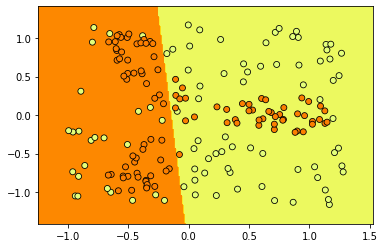

In [ ]:
plot_decision_boundary(clf.predict, X_test, Y_test)


As we can see Logistic Regression is limited to fitting a linear decision boundary and hence cannot fit this data very well.



#PS:Implementing an ANN
##Architecture
For this task, our Neural Network will have 1 Input Layer (with 2 units), 1 Ouput Layer (with 1 unit) and 1 Hidden Layer (with  units). The Hidden Layer will have the tanh activation function while the Output Layer will have the sigmoid activation function. The cost function is binary cross entropy and we will use Gradient Descent as the optimization algorithm.
![An image](https://www.researchgate.net/profile/Hamid-Asgari-4/publication/277100533/figure/fig1/AS:294489198481409@1447223104283/A-simple-structure-of-a-typical-Artificial-Neural-Network-ANN-with-input-hidden-and.png)

For this model we'll define a set of helper functions that perform small tasks. We'll then put all these functions into another function to complete the model.

##Initialize Parameters
Define a function that initializes the parameters for a 2 Layer Neural network with number of hidden units n_H. The Weight matrices are initialized radomly to break symmetry. The Bias vectors are initialized with zeros.
Input: X, Y and n_H.
Ouput: parameters (A list containing 4 variables in the following order [W1, b1, W2, b2]).<br>
Instructions:
* Initialize Weight matrices with random numbers from a Standard Normal Distribution.
* Initialize Bias vectors with zeros.
* Make sure the shape of the matrices are correct for given value of n_H.

In [ ]:
def initialize_parameters(X, Y, n_H):
    '''
    Weight matrices have to be initialized randomly (use the suitable numpy method).
    Bias vectors need to be initialized with zeros (np.zeros)
    #Your code here
    '''
    '''
    (Uncomment this part)
    W1 = 
    b1 =
    W2 = 
    b2 =
    '''
    parameters = []
    

    return parameters

##Activation Function
Define a function that computes the elementwise sigmoid of a vector. For the tanh activation we can use NumPy's np.tanh() function.

Input: Z (A vector)<br>
Output: Elementwise sigmoid of Z (A vector with same dimensions as Z)

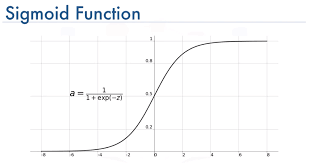

Basically sigmoid( w^T x + b) has to be computed.

In [ ]:
def sigmoid(Z):
  '''
  input is Z which is the product of the transpose of weights and the vector X, and this would be added to the bias.
  '''  
  #Your code here and replace None with return value
    
  s = None
  
  return s

##Forward Propagation
Define a function to perform a single step of forward propagation through the ANN.

Input: X, parameters.<br>
Ouput: cache (A list containing 4 variables in the following order [Z1, A1, Z2, A2]).<br>
Instructions:

Make sure you use the correct activation function for the correct layer.

In [ ]:
def forward_propagate(X, parameters):
    
    #Unpacking parameters
    W1 = parameters[0]
    b1 = parameters[1]
    W2 = parameters[2]
    b2 = parameters[3]

    #Your code here
    '''
    Z1 = 
    A1 = 
    Z2 = 
    A2 = 
    '''
    cache = []

    return cache


##Compute The Cost
Define a function that computes the binary cross entropy cost.

Input: cache, Y.<br>
Ouput: **J** (A single real number).<br>
Instructions:

Unpack the cache by following similar steps as shown above.
If you need , think how you can obtain it from given inputs.

In [ ]:
def compute_cost(cache, Y):
    
    #Your code here
    Z1 = cache[0]
    A1 = cache[1]
    Z2 = cache[2]
    A2 = cache[3]

    m = Y.shape[1]
    '''
    cost = 
    '''
    return None


##BackPropagation
Define a function that performs a single step of backward propagation through the entire network.

**Input**: X, Y, parameters and cache.<br>
**Output**: grads (A list containing 4 variables in the following order [dW1, db1, dW2, db2]).<br>
**Instructions**:

* Make sure you unpack parameters and cache.
* For ∑<sub>col </sub>
  make sure you set `keepdims = True` in `np.sum()` for NumPy broadcasting purposes.
In the first step of Backpropagation, instead of first computing `dA2` and then computing `dZ2`, for sigmoid activation you can directly compute `dZ2=A2-Y`. Try figuring out why this works.
* Verify that the shape of Θ and `dΘ` are same (where Θ is some variable).


In [ ]:
def backward_propagate(X, Y, parameters, cache):
    
    W1 = parameters[0]
    b1 = parameters[1]
    W2 = parameters[2]
    b2 = parameters[3]

    Z1 = cache[0]
    A1 = cache[1]
    Z2 = cache[2]
    A2 = cache[3]

    #Your code here
    '''
    dW1 = 
    db1 =
    dW2 = 
    db2 = 
    '''

    grads = []
    
    return grads

##Updating Parameters
Define a function that updates the parameters for a single step of Gradient Descent.

**Input**: parameters, grads, learning_rate.<br>
**Output**: parameters (Updated Values).<br>
**Instructions**:

* Make sure you unpack parameters and grads.

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters[0]
    b1 = parameters[1]
    W2 = parameters[2]
    b2 = parameters[3]

    dW1 = grads[0]
    db1 = grads[1]
    dW2 = grads[2]
    db2 = grads[3]

    #Your code here
    '''
    W1 = 
    b1 = 
    W2 = 
    b2 = 
    '''
    parameters = []
    return parameters 

##Final Model
It's finally time to put all your helper functions together and create the model. This function will take all the inputs required for the helper functions and it will output a list of 4 variables, the trained parameters.
**Input**:X, Y, n_H, learning_rate, num_iterations.<br>
**Output**:parameters (Trained parameters).<br>
**Instructions**:
* Make sure you properly use the helper functions defined above.
* **Costs**:
>1. Create an empty list in the beginning and call it `costs`.After every iteration of Gradient Descent append the cost computed in that iteration to this empty list.<br>
>2. Print the cost after every 100 iterations in a presentable format.
>3.Using `costs` plot the cost v/s iterations graph.

In [ ]:
def model(X, Y, n_H, learning_rate, num_iterations):
    
    #Your code here
    for i in range(0,num_iterations):
      pass
    
    return None

Once you've finished writing this function, execute the following piece of code.

In [ ]:
trained_parameters = model(X_train, Y_train, 3, 1, 300)


If everything works fine, the graph should be continuously decreasing, and the costs should be as follows:<br>
Cost after iteration 0: 0.7113580425658097<br>
Cost after iteration 100: 0.4574478174001088<br>
Cost after iteration 200: 0.41970627181942366<br>
Cost after iteration 300: 0.4056437392259494.<br>
If this is not the case, there might be some error in some helper function or your model. Try fixing that. If everything worked fine move ahead.

##Predict
Define a function that predicts the class given an input X. If the Neural Network ouputs a value greater than or equal to 0.5, the class is 1 and if it outputs a value less than 0.5, the class is 0.<br>
**Input**: X, trained_prameters.<br>
**Output**: Predictions.<br>
Hint: You will use 1 helper function in this function.

In [ ]:
def predict(X, trained_parameters):
    
    #Your code here and replace None with return value
    
    return 

##Accuracy
Define a function that computes accuracy.

**Input**: Predictions, True Value.<br>
**Output**: Accuracy (a single real number).<br>
Hint: Remember that, 
$Accuracy=\frac{Number Of Values Predicted Correctly}{Total Number of Values}$

In [ ]:
def accuracy(predictions, actual):
    
    #Your code here and replace None with return value
    
    return None

Uncomment and run this piece of code to find the training and test set accuracy

In [ ]:
#print(f"Train set accuracy: {accuracy(predict(X_train, trained_parameters), Y_train)*100}"+"%")
#print(f"Test set accuracy: {accuracy(predict(X_test, trained_parameters), Y_test)*100}"+"%")

If all goes well, you should get the train set accuracy as:84.95575221238938% and test set accuracy as: 85.56701030927834%

Well, the accuracy of ANN is clearly far better than the accuracy of Logistic Regression.  The addition of a single hidden layer gives the ANN the capability of fitting a non-linear decision boundary. The activation function in the hidden layer adds this Non-Linear factor to the model. By adding more hidden layers we can fit even more complex functions.